In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json 

# Parsing du fichier

Dans le serveur, localiser le fichier à copier (en général, dans les checkpoints) qui s'appelle `trainer_state.json`. Le copier avec `scp`. Voici un exemple de syntaxe. 

`scp auXXXXX@ens.ad.etsmtl.ca@logti-hyperbole.ens.ad.etsmtl.ca:~/job/output/checkpoint-32500/trainer_state.json .`

In [2]:
trainer_state_file = 'trainer_state.json'

# Load the trainer state
if os.path.exists(trainer_state_file):
    with open(trainer_state_file, 'r') as f:
        trainer_state = json.load(f)
        

In [4]:
print(trainer_state.keys())

dict_keys(['best_metric', 'best_model_checkpoint', 'epoch', 'eval_steps', 'global_step', 'is_hyper_param_search', 'is_local_process_zero', 'is_world_process_zero', 'log_history', 'logging_steps', 'max_steps', 'num_input_tokens_seen', 'num_train_epochs', 'save_steps', 'stateful_callbacks', 'total_flos', 'train_batch_size', 'trial_name', 'trial_params'])


# Fonction de coût 

In [13]:
log_history = trainer_state['log_history']

# Convert the log history to a DataFrame
df = pd.DataFrame(log_history)
df.head()

,epoch,grad_norm,learning_rate,loss,step
0,0.149388,2.448775,0.000049,0.8793,500
1,0.298775,2.510653,0.000049,0.5525,1000
2,0.448163,2.336909,0.000048,0.4958,1500
3,0.597550,2.793200,0.000047,0.4665,2000
4,0.746938,3.010546,0.000046,0.4597,2500


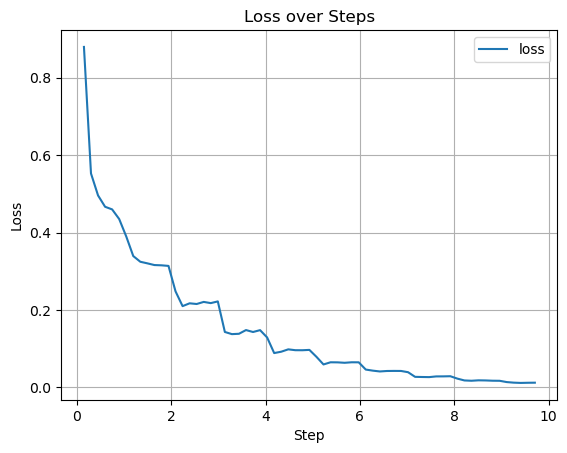

In [ ]:

df.plot(x='epoch', y='loss', title='Loss over Steps')
plt.xlabel('Epoch')  
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
print(trainer_state['best_metric'])

500
